In [10]:
import os
import numpy as np 
import pandas as pd
data = pd.read_csv("~/Desktop/MLfinal/data/merged_files.csv")
data = pd.DataFrame(data)
data = data.drop(columns = ['Unnamed: 0', 'BIKE STANDS', 'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES'])

In [11]:
# pivot data to make graphing easier, aggregating the mean usage for each hour

data["datetime"] = pd.to_datetime(data["TIME"])
df = data.pivot_table(index='datetime', columns='NAME', values='Usage', aggfunc='mean')

# Remove nighttime rows where nothing's happening
df = df.between_time('05:00', '22:00')
print(df)

NAME                 FREDERICK STREET SOUTH  GRAND CANAL DOCK  JAMES STREET
datetime                                                                   
2020-04-01 05:00:00                    85.0              72.5          65.0
2020-04-01 06:00:00                    85.0              67.5          65.0
2020-04-01 07:00:00                    85.0              70.0          67.5
2020-04-01 08:00:00                    85.0              65.0          65.0
2020-04-01 09:00:00                    85.0              62.5          67.5
...                                     ...               ...           ...
2021-01-01 18:00:00                    75.0              40.0          40.0
2021-01-01 19:00:00                    75.0              50.0          40.0
2021-01-01 20:00:00                    75.0              42.5          37.5
2021-01-01 21:00:00                    75.0              45.0          37.5
2021-01-01 22:00:00                    75.0              42.5          37.5

[4968 rows 

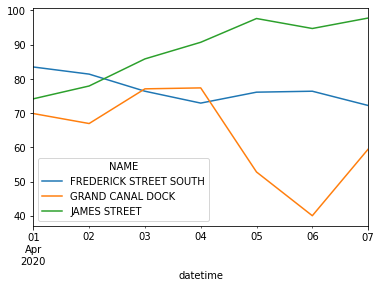

In [12]:
dailymean = df.resample("D").mean()
dailymean["2020-04-01":"2020-04-07"].plot();

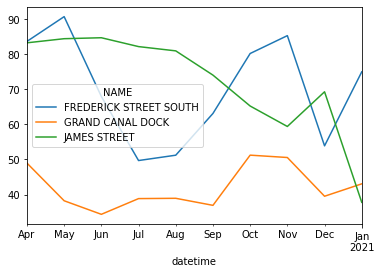

In [13]:
monthlymean = df.resample("M").mean()
monthlymean.plot();